In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/dataset-salary/Dataset salary 2024.csv


In [2]:
df=pd.read_csv('/kaggle/input/dataset-salary/Dataset salary 2024.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [4]:
print(df.isnull().sum())
  

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [5]:
# Set the display format for floating point numbers
pd.options.display.float_format = '{:.2f}'.format
df.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,16534.00,16534.00,16534.00,16534.00
mean,2023.23,163726.96,149686.78,32.00
std,0.71,340205.74,68505.29,46.25
min,2020.00,14000.00,15000.00,0.00
25%,2023.00,101763.00,101125.00,0.00
50%,2023.00,142200.00,141300.00,0.00
75%,2024.00,187200.00,185900.00,100.00
max,2024.00,30400000.00,800000.00,100.00


In [6]:
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 
                       'employee_residence', 'remote_ratio', 'company_location', 'company_size']

for col in categorical_columns:
    df[col] = df[col].astype('category')
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [7]:
# Map experience level to descriptive labels
experience_level_mapping = {
    'EN': 'Entry-level/Junior',
    'MI': 'Mid-level/Intermediate',
    'SE': 'Senior-level',
    'EX': 'Executive-level'
}
df['experience_level'] = df['experience_level'].map(experience_level_mapping)

# Map employment type to descriptive labels
employment_type_mapping = {
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
}
df['employment_type'] = df['employment_type'].map(employment_type_mapping)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


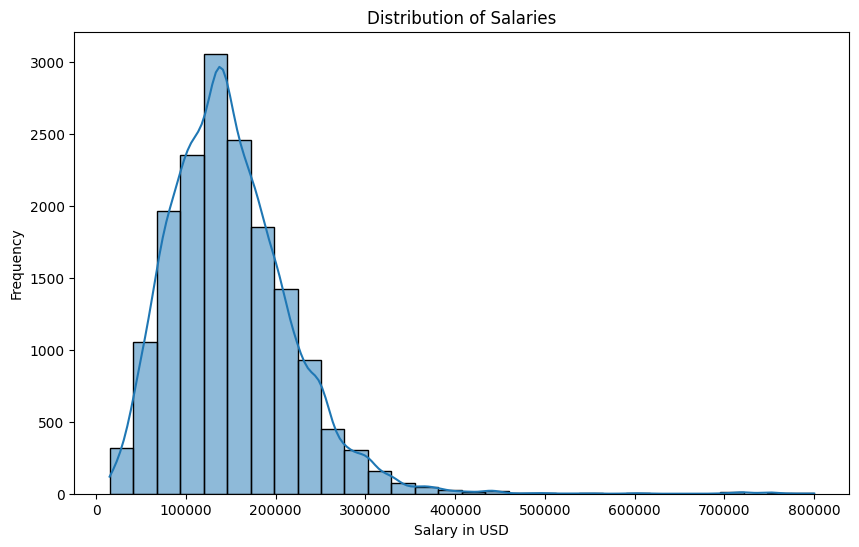

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()


/tmp/ipykernel_18/3344025207.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


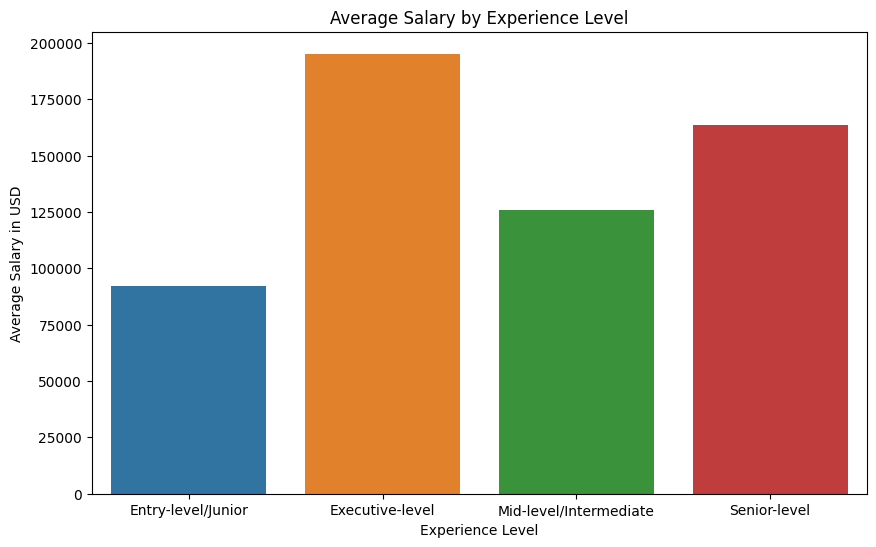

In [9]:
avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=avg_salary_by_experience)
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Experience Level')
plt.show()


In [10]:
import plotly.express as px

# Example: Interactive scatter plot by experience level and salary
fig = px.scatter(df, x='experience_level', y='salary_in_usd', color='employment_type', hover_data=['job_title'])
fig.update_layout(title='Interactive Salary by Experience Level and Employment Type')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers
/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


/tmp/ipykernel_18/3042909635.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



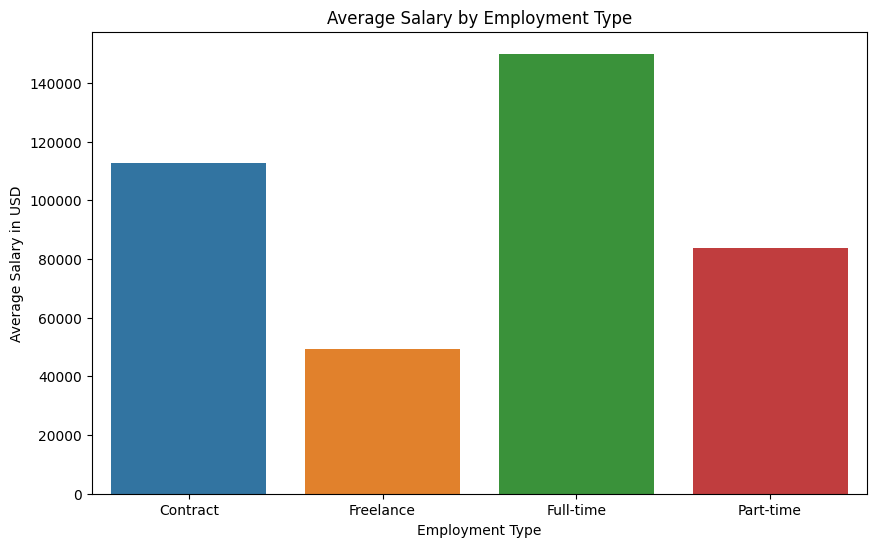

In [11]:
avg_salary_by_employment = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='employment_type', y='salary_in_usd', data=avg_salary_by_employment)
plt.xlabel('Employment Type')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Employment Type')
plt.show()


Unique Remote Ratios:
[0, 100, 50]
Categories (3, int64): [0, 50, 100]
Remote Ratio Counts:
remote_ratio
0% Remote (On-site)    11118
100% Remote             5167
50% Remote (Hybrid)      249
Name: count, dtype: int64
Average Salary by Remote Ratio:
          remote_ratio    salary
0  0% Remote (On-site) 154675.46
1  50% Remote (Hybrid) 532770.39
2          100% Remote 165419.01


/tmp/ipykernel_18/599560424.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



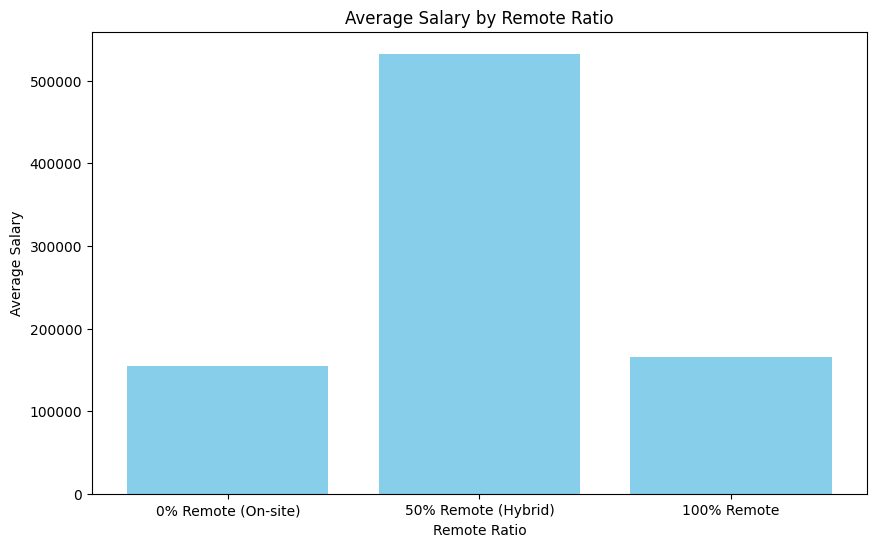

In [12]:

# Displaying unique values in the remote_ratio 
print('Unique Remote Ratios:')
print(df['remote_ratio'].unique())
# Mapping dictionary for remote ratio
remote_ratio_mapping = {
    0: '0% Remote (On-site)',
    50: '50% Remote (Hybrid)',
    100: '100% Remote'
}

# Map the numeric values to descriptive labels
df['remote_ratio'] = df['remote_ratio'].map(remote_ratio_mapping)

# Counting the number of each remote ratio
remote_ratio_counts = df['remote_ratio'].value_counts()
print('Remote Ratio Counts:')
print(remote_ratio_counts)

# Calculating average salary by remote ratio
salary_by_remote_ratio = df.groupby('remote_ratio')['salary'].mean().reset_index()
print('Average Salary by Remote Ratio:')
print(salary_by_remote_ratio)

# Plot average salary by remote ratio
plt.figure(figsize=(10, 6))
plt.bar(salary_by_remote_ratio['remote_ratio'], salary_by_remote_ratio['salary'], color='skyblue')
plt.xlabel('Remote Ratio')
plt.ylabel('Average Salary')
plt.title('Average Salary by Remote Ratio')
plt.xticks(salary_by_remote_ratio['remote_ratio'])
plt.show()


/tmp/ipykernel_18/956311972.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



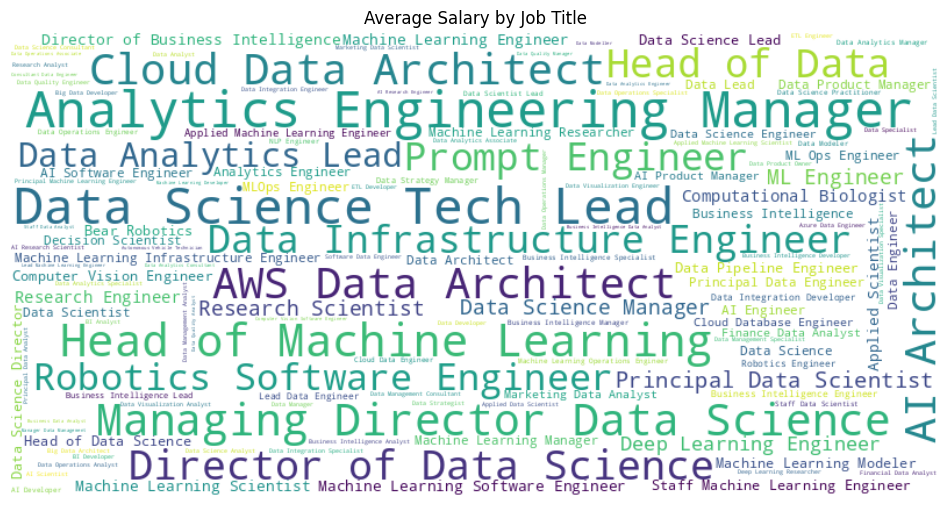

In [13]:
from wordcloud import WordCloud
salary_dict = df.groupby('job_title')['salary_in_usd'].mean().to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(salary_dict)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Average Salary by Job Title')
plt.show()


In [14]:
# Get all unique company locations
unique_locations = df['company_location'].unique()

print(unique_locations)


['US', 'AU', 'GB', 'CA', 'NL', ..., 'DZ', 'IQ', 'CN', 'CL', 'MD']
Length: 77
Categories (77, object): ['AD', 'AE', 'AM', 'AR', ..., 'UA', 'US', 'VN', 'ZA']


In [15]:
# Count occurrences of each company location
location_counts = df['company_location'].value_counts()

print(location_counts)


company_location
US    14518
GB      694
CA      455
ES      133
DE      105
      ...  
IR        1
CL        1
MD        1
OM        1
AD        1
Name: count, Length: 77, dtype: int64


In [16]:
import plotly.express as px

# Calculating average salary by company location
avg_salary_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Plotting
fig = px.bar(avg_salary_by_location, x='company_location', y='salary_in_usd', 
             labels={'company_location': 'Company Location', 'salary_in_usd': 'Average Salary in USD'},
             title='Average Salary by Company Location')
fig.update_xaxes(tickangle=45)
fig.show()


/tmp/ipykernel_18/1757555196.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



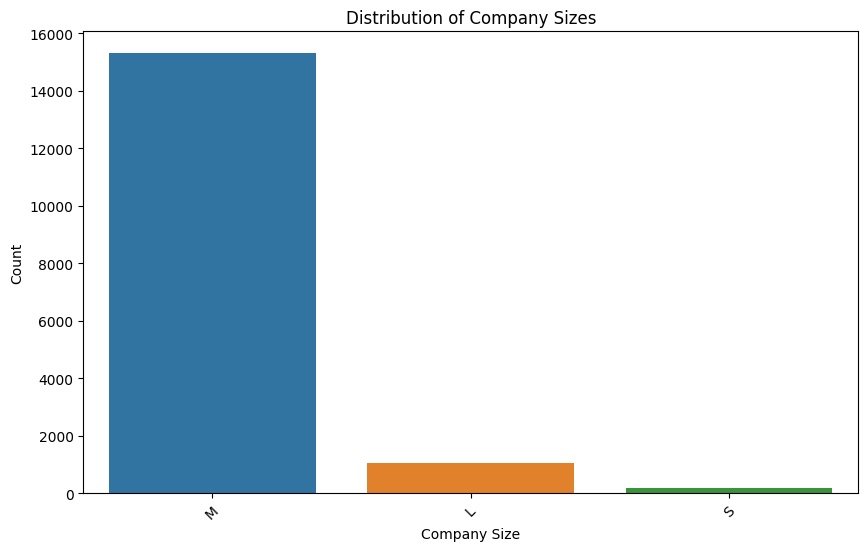

In [17]:
# Count plot of company sizes
plt.figure(figsize=(10, 6))
sns.countplot(x='company_size', data=df, order=df['company_size'].value_counts().index)
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [18]:
df=pd.read_csv('/kaggle/input/dataset-salary/Dataset salary 2024.csv')
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


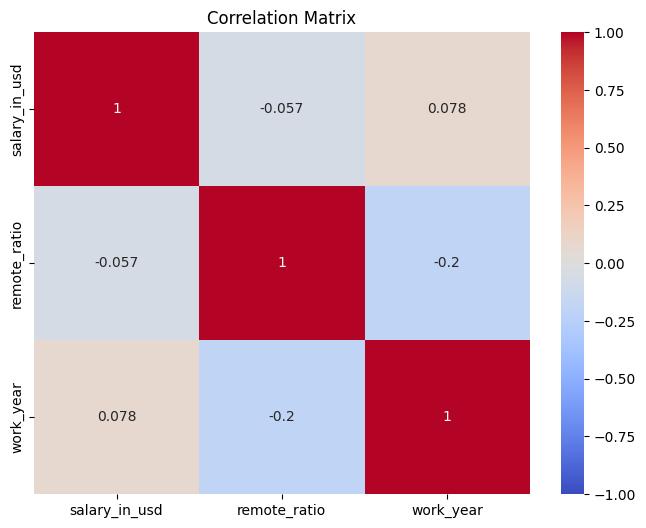

In [19]:
# Correlation matrix
correlation_matrix = df[['salary_in_usd', 'remote_ratio', 'work_year']].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



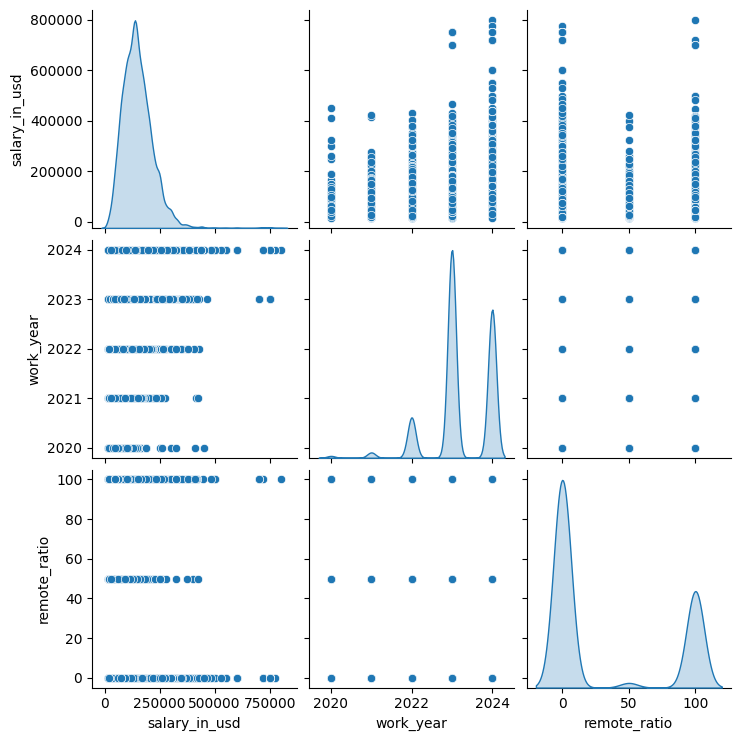

In [20]:
# Pairplot for selected variables
sns.pairplot(df[['salary_in_usd', 'work_year', 'remote_ratio', 'company_size']], diag_kind='kde')
#plt.suptitle('Pairplot of Salary, Work Year, Remote Ratio, and Company Size')
plt.show()


Mean Squared Error: 4.208921748788687e+31


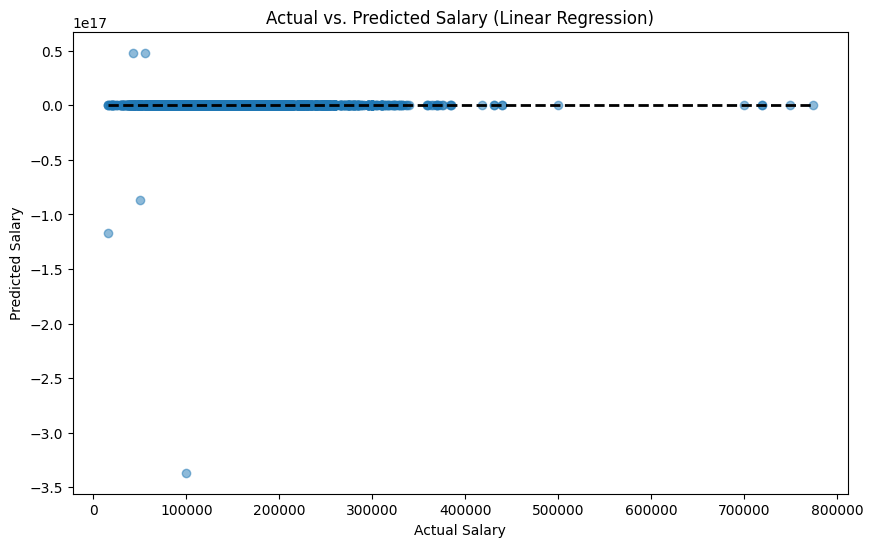

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example: Predicting salary based on experience level
X = pd.get_dummies(df[['experience_level', 'employment_type', 'company_location']])
y = df['salary_in_usd']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary (Linear Regression)')
plt.show()
